<a href="https://colab.research.google.com/github/jigglypufflazybaby/deep-learning-lab/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import gradio as gr

In [3]:
# Data preparation
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    return (x_train, y_train), (x_test, y_test)

In [4]:
# Model development
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [5]:
# Model training and evaluation
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test):
    history = model.fit(x_train, y_train, epochs=25, batch_size=64,
                        validation_split=0.1, verbose=1)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return history, test_acc

In [6]:
# Analysis and visualization
def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def generate_classification_report(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test.reshape(-1), y_pred_classes))

In [7]:
# Gradio interface function
def classify_image(image):
    # Preprocess the image
    image = tf.image.resize(image, (32, 32))
    image = image / 255.0
    image = tf.expand_dims(image, 0)

    # Make prediction
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction[0])

    # Prepare confidence scores
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    confidence_scores = {class_names[i]: float(prediction[0][i]) for i in range(10)}

    return {class_names[predicted_class]: confidence_scores[class_names[predicted_class]]}, confidence_scores

Training model for CIFAR-10 dataset
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.3434 - loss: 2.0544 - val_accuracy: 0.6192 - val_loss: 1.0807
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5891 - loss: 1.1631 - val_accuracy: 0.6780 - val_loss: 0.9053
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6650 - loss: 0.9569 - val_accuracy: 0.7276 - val_loss: 0.7976
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7112 - loss: 0.8262 - val_accuracy: 0.7030 - val_loss: 0.8423
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7399 - loss: 0.7539 - val_accuracy: 0.7778 - val_loss: 0.6388
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7600 - loss: 0.6978 - val_accuracy: 0.6888 - val_loss: 0.9250
Epoch 7/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7800 - loss: 0.6375 - val_accuracy: 0.7776 - val_loss: 0.6417
Epoch 8/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7964 - loss: 0.5908 - val_accur

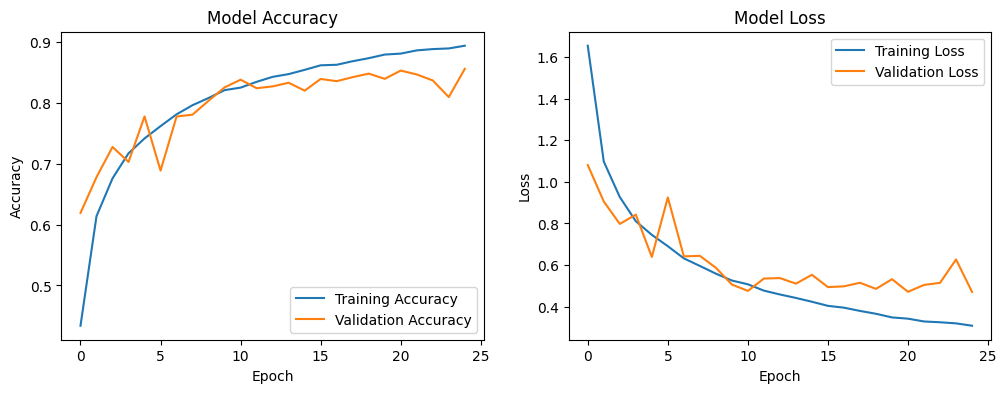

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.91      0.95      0.93      1000
           2       0.76      0.82      0.79      1000
           3       0.75      0.71      0.73      1000
           4       0.86      0.82      0.84      1000
           5       0.85      0.73      0.78      1000
           6       0.82      0.92      0.87      1000
           7       0.89      0.88      0.88      1000
           8       0.92      0.90      0.91      1000
           9       0.93      0.90      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://60c11f36e8b88f2329.gradio.live

This share link expires in 72 hours. For free per

In [8]:
# Main execution
def main():
    global model  # Make model global so it can be accessed by Gradio interface

    print("Training model for CIFAR-10 dataset")
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

    model = create_model()
    history, test_acc = train_and_evaluate_model(model, x_train, y_train, x_test, y_test)

    print(f"Test accuracy: {test_acc:.4f}")
    plot_accuracy_loss(history)
    generate_classification_report(model, x_test, y_test)

    # Create Gradio interface
    iface = gr.Interface(
        fn=classify_image,
        inputs=gr.Image(type="numpy"),
        outputs=[
            gr.Label(num_top_classes=1),
            gr.Label(label="Confidence Scores")
        ],
        live=True,
        title="CIFAR-10 Image Classifier",
        description="Upload an image to classify it into one of the CIFAR-10 categories.",
    )

    # Launch the interface
    iface.launch(share=True)

if __name__ == "__main__":
    main()